**proyecto**
# Clasificador de audio según género
## Diplomado Ciencia de Datos - modulo IV  
  
  
  
  
**Profesor: Oscar Daniel Acosta González**  
**presenta: Hernández González Ricardo Paramont**  

### Dependencias 

In [1]:
import soundfile as sf
import librosa
from os import listdir
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import keras

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Reshape

### Carga de datos

In [2]:
#Cargando train
women_train_list = []
for file in listdir('./data/train/women/'):
    a = librosa.core.load('./data/train/women/'+file)
    women_train_list.append(a[0])
    
men_train_list = []
for file in listdir('./data/train/men/'):
    a = librosa.core.load('./data/train/men/'+file)
    men_train_list.append(a[0])


#Cargando test
women_test_list = []
for file in listdir('./data/test/women/'):
    a = librosa.core.load('./data/test/women/'+file)
    women_test_list.append(a[0])
    
men_test_list = []
for file in listdir('./data/test/men/'):
    a = librosa.core.load('./data/test/men/'+file)
    men_test_list.append(a[0])

### EDA

Archivos de sonido de mujeres

(array([ 0.00087995,  0.00127312,  0.00126336, ..., -0.00441206,
       -0.00488524,  0.        ], dtype=float32), 22050)


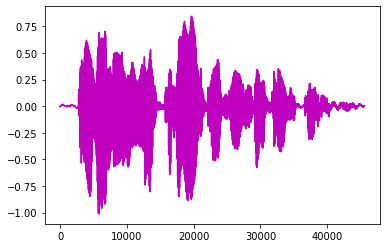

Archivos de sonido de mujeres

(array([ 0.00087995,  0.00127312,  0.00126336, ..., -0.00441206,
       -0.00488524,  0.        ], dtype=float32), 22050)


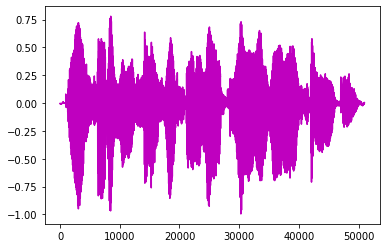

Archivos de sonido de mujeres

(array([ 0.00087995,  0.00127312,  0.00126336, ..., -0.00441206,
       -0.00488524,  0.        ], dtype=float32), 22050)


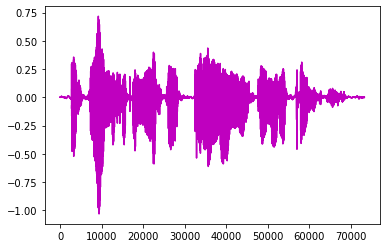

Archivos de sonido de mujeres

(array([ 0.00087995,  0.00127312,  0.00126336, ..., -0.00441206,
       -0.00488524,  0.        ], dtype=float32), 22050)


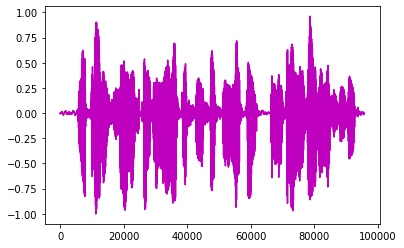

Archivos de sonido de mujeres

(array([ 0.00087995,  0.00127312,  0.00126336, ..., -0.00441206,
       -0.00488524,  0.        ], dtype=float32), 22050)


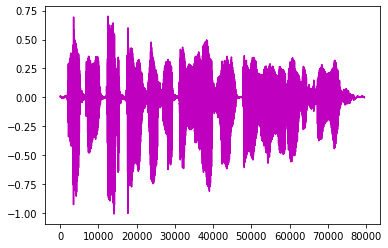

Archivos de sonido de mujeres

(array([ 0.00087995,  0.00127312,  0.00126336, ..., -0.00441206,
       -0.00488524,  0.        ], dtype=float32), 22050)


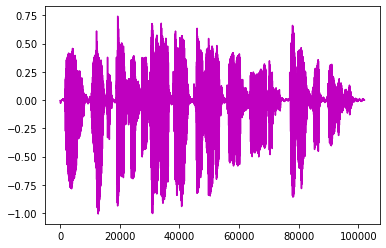

Archivos de sonido de mujeres

(array([ 0.00087995,  0.00127312,  0.00126336, ..., -0.00441206,
       -0.00488524,  0.        ], dtype=float32), 22050)


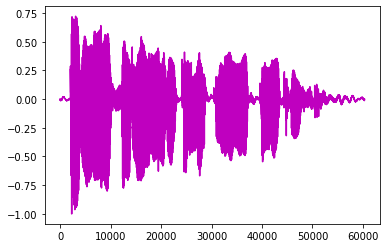

Archivos de sonido de mujeres

(array([ 0.00087995,  0.00127312,  0.00126336, ..., -0.00441206,
       -0.00488524,  0.        ], dtype=float32), 22050)


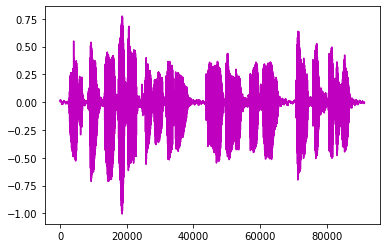

Archivos de sonido de mujeres

(array([ 0.00087995,  0.00127312,  0.00126336, ..., -0.00441206,
       -0.00488524,  0.        ], dtype=float32), 22050)


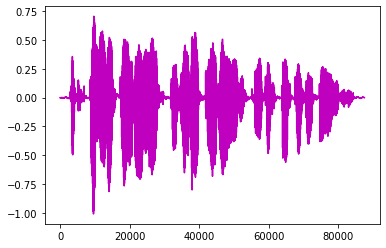

Archivos de sonido de mujeres

(array([ 0.00087995,  0.00127312,  0.00126336, ..., -0.00441206,
       -0.00488524,  0.        ], dtype=float32), 22050)


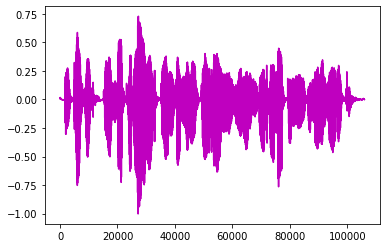

Archivos de sonido de mujeres

(array([ 0.00087995,  0.00127312,  0.00126336, ..., -0.00441206,
       -0.00488524,  0.        ], dtype=float32), 22050)


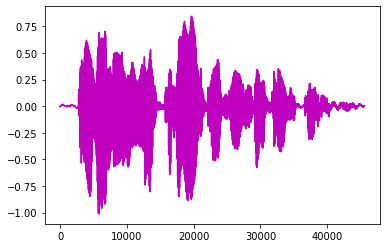



Archivos de sonido de hombres

(array([ 0.00087995,  0.00127312,  0.00126336, ..., -0.00441206,
       -0.00488524,  0.        ], dtype=float32), 22050)


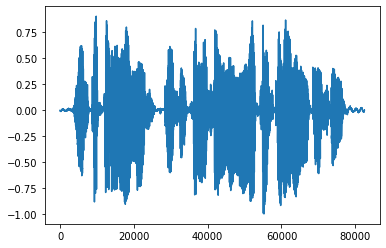



Archivos de sonido de hombres

(array([ 0.00087995,  0.00127312,  0.00126336, ..., -0.00441206,
       -0.00488524,  0.        ], dtype=float32), 22050)


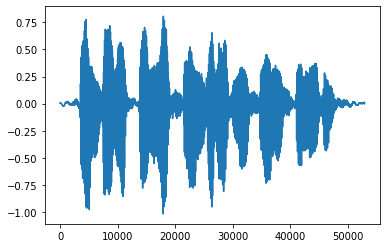



Archivos de sonido de hombres

(array([ 0.00087995,  0.00127312,  0.00126336, ..., -0.00441206,
       -0.00488524,  0.        ], dtype=float32), 22050)


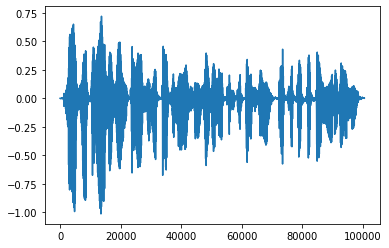



Archivos de sonido de hombres

(array([ 0.00087995,  0.00127312,  0.00126336, ..., -0.00441206,
       -0.00488524,  0.        ], dtype=float32), 22050)


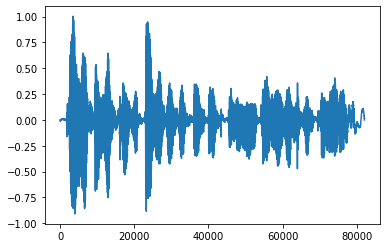



Archivos de sonido de hombres

(array([ 0.00087995,  0.00127312,  0.00126336, ..., -0.00441206,
       -0.00488524,  0.        ], dtype=float32), 22050)


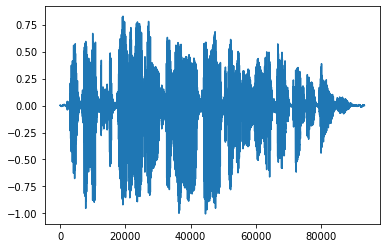



Archivos de sonido de hombres

(array([ 0.00087995,  0.00127312,  0.00126336, ..., -0.00441206,
       -0.00488524,  0.        ], dtype=float32), 22050)


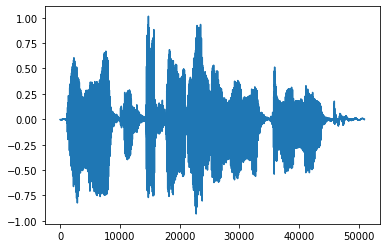



Archivos de sonido de hombres

(array([ 0.00087995,  0.00127312,  0.00126336, ..., -0.00441206,
       -0.00488524,  0.        ], dtype=float32), 22050)


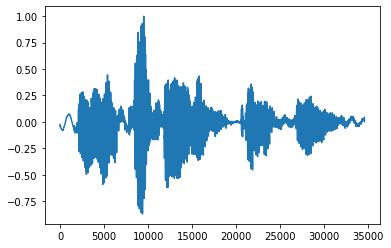



Archivos de sonido de hombres

(array([ 0.00087995,  0.00127312,  0.00126336, ..., -0.00441206,
       -0.00488524,  0.        ], dtype=float32), 22050)


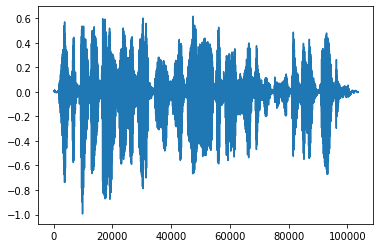



Archivos de sonido de hombres

(array([ 0.00087995,  0.00127312,  0.00126336, ..., -0.00441206,
       -0.00488524,  0.        ], dtype=float32), 22050)


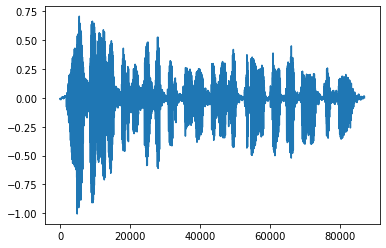



Archivos de sonido de hombres

(array([ 0.00087995,  0.00127312,  0.00126336, ..., -0.00441206,
       -0.00488524,  0.        ], dtype=float32), 22050)


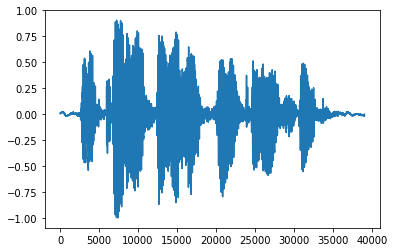



Archivos de sonido de hombres

(array([ 0.00087995,  0.00127312,  0.00126336, ..., -0.00441206,
       -0.00488524,  0.        ], dtype=float32), 22050)


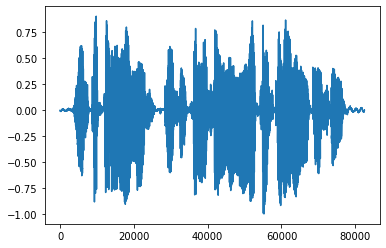

In [3]:
#Se muestra que la carga de audio funcionó
for num in range(11):
    print("Archivos de sonido de mujeres\n")
    print (a)
    plt.plot(women_train_list[-num], 'm')
    plt.show()
for num in range(11):
    print("\n\nArchivos de sonido de hombres\n")
    print (a)
    plt.plot(men_train_list[-num])
    plt.show()

### Tratamiento/Ingeniería de datos

##### Espectrograma

In [4]:
#Cálculo del espectrograma
def mel_spectrogram(wav, sr, db=True, n_fft=2**10, **kwargs):
    M = librosa.feature.melspectrogram(wav, sr=sr, n_fft=n_fft, **kwargs)
    if db:                                                               
       return librosa.power_to_db(M, ref=np.max)                        
    else:                                                                
       return M   

#Construcción de espectrograma
def create_mel_spectrogram(wav_file):                        
   #wave, samplerate = read_wav(wav_file)                    
   melspec = mel_spectrogram(wav_file, sr=16000, n_fft=1024)  
   return np.abs(melspec) / np.linalg.norm(np.abs(melspec)) 

#Graficado de espectrograma
def plot_matrix(m, message='', cmap='binary'): 
   plt.matshow(m, cmap=cmap)              
   plt.title(message)          
   plt.show() 

In [5]:
#Cálculo espectrograma train
spec_women_train_list = []
for file in women_train_list:
    a = create_mel_spectrogram(file)
    spec_women_train_list.append(a)
    
spec_men_train_list = []
for file in men_train_list:
    a = create_mel_spectrogram(file)
    spec_men_train_list.append(a)
    

#Cálculo espectograma test
spec_women_test_list = []
for file in women_test_list:
    a = create_mel_spectrogram(file)
    spec_women_test_list.append(a)
    
spec_men_test_list = []
for file in men_test_list:
    a = create_mel_spectrogram(file)
    spec_men_test_list.append(a)

Espectrogramas de mujeres



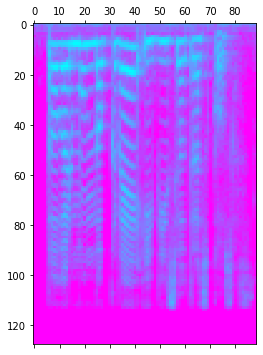

Espectrogramas de mujeres



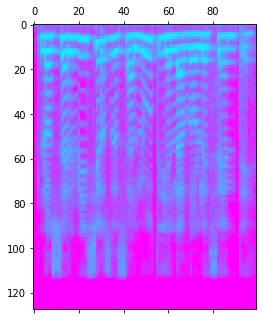

Espectrogramas de mujeres



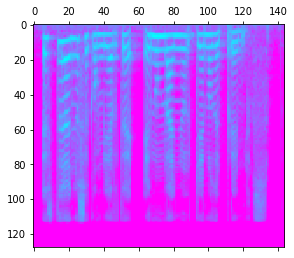

Espectrogramas de mujeres



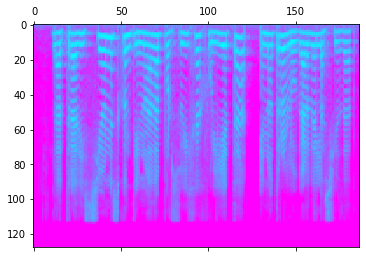

Espectrogramas de mujeres



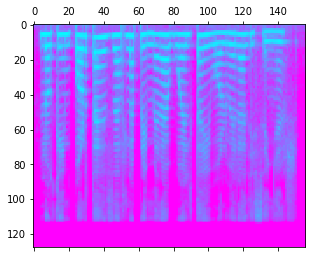

Espectrogramas de mujeres



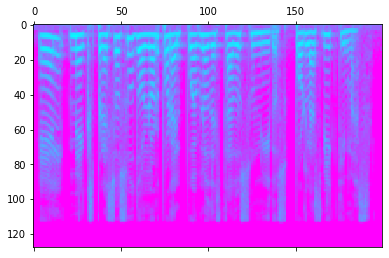

Espectrogramas de mujeres



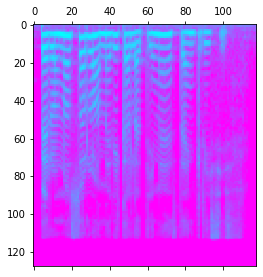

Espectrogramas de mujeres



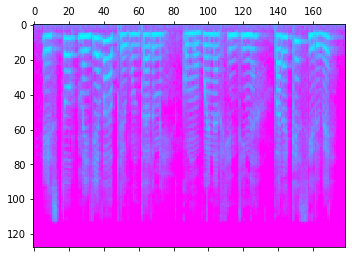

Espectrogramas de mujeres



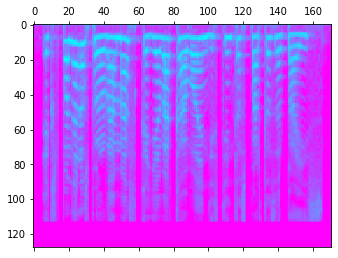

Espectrogramas de mujeres



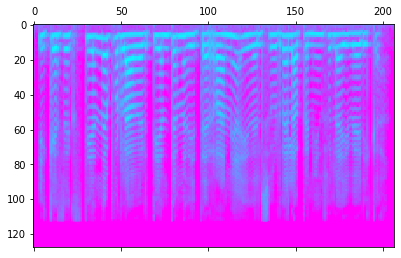

Espectrogramas de mujeres



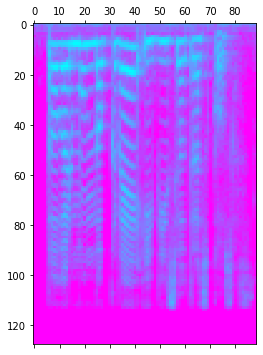



Espectrogramas de hombres



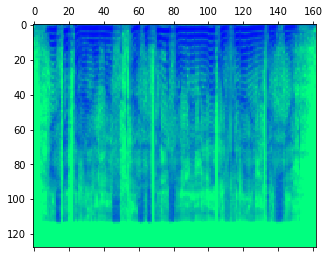



Espectrogramas de hombres



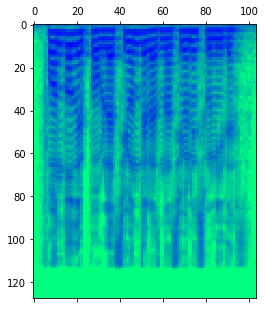



Espectrogramas de hombres



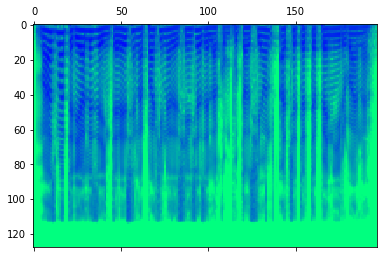



Espectrogramas de hombres



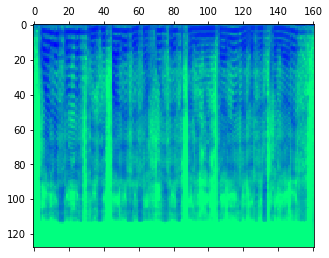



Espectrogramas de hombres



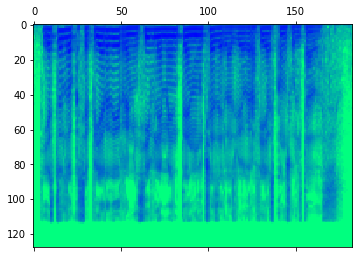



Espectrogramas de hombres



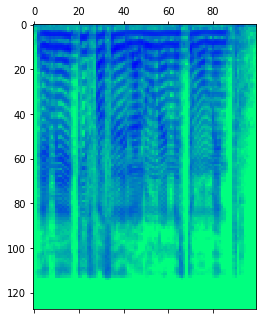



Espectrogramas de hombres



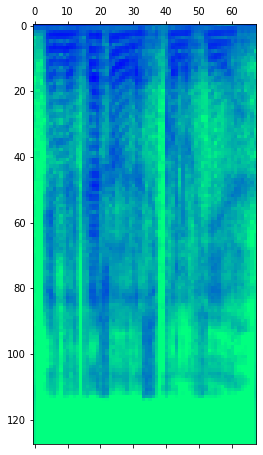



Espectrogramas de hombres



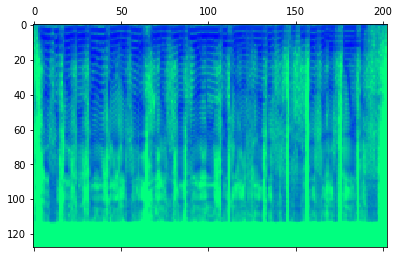



Espectrogramas de hombres



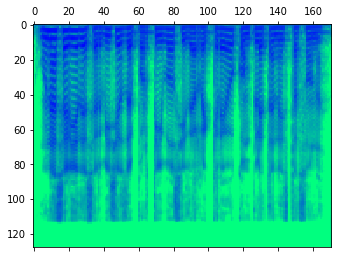



Espectrogramas de hombres



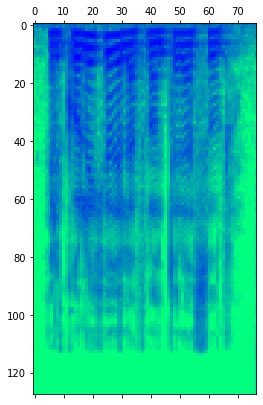



Espectrogramas de hombres



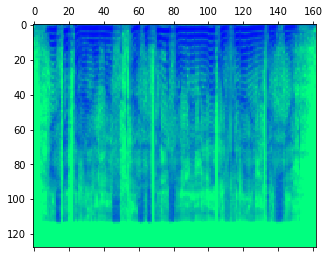

In [6]:
#Representación gráfica del espectrograma
for num in range(11):
    print("Espectrogramas de mujeres\n")
    plot_matrix(spec_women_train_list[-num], cmap='cool')
for num in range(11):
    print("\n\nEspectrogramas de hombres\n")
    plot_matrix(spec_men_train_list[-num], cmap='winter')

#### Segmentación

In [7]:
X_train=[]
y_train=[]

In [8]:
#Haciendo cortes (segmentos) en el train
segment_women_train_list =[]
for spec in spec_women_train_list:
    for segment in range(0,spec.shape[1]-10,10):
        X_train.append(spec[:,segment:segment+10].reshape((128,10,1)))
        y_train.append([0,1])
        
segment_men_train_list =[]
for spec in spec_men_train_list:
    for segment in range(0,spec.shape[1]-10,10):
        X_train.append(spec[:,segment:segment+10].reshape((128,10,1)))
        y_train.append([1,0])


### Modelado

#### contrucción modelo

In [9]:
model = Sequential()

In [10]:
#Capa convolucional 2D
model.add(Conv2D(24, (3, 3), padding='same',
                 input_shape=(128,10,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
#Capa convolucional 2D
model.add(Conv2D(24, (3, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
#Capa convolucional 2D
#model.add(Conv2D(7, (3, 3), padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Activation('relu'))
#Capa convolucional 2D
model.add(Conv2D(7, (3, 3), padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Activation('relu'))
#Hacer el reshape de la ultima convolucional
#(la estiramos)
model.add(Flatten())
#Capa de red neurnal normal
model.add(Dense(30,activation='relu'))
#Salida de la red neuronal
model.add(Dense(2,activation='softmax'))
#Activacion de la salida
#model.add(Activation('softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 10, 24)       240       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 5, 24)         0         
_________________________________________________________________
activation (Activation)      (None, 64, 5, 24)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 5, 24)         5208      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 2, 24)         0         
_________________________________________________________________
activation_1 (Activation)    (None, 32, 2, 24)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 2, 7)          1

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### entrenamiento

In [13]:
#Entrenar
x=np.array(X_train)
y=np.array(y_train)
model.fit(x,y,batch_size=100,epochs=100,validation_split=0.1)

Epoch 1/100
3/3 [==============================] - 8s 214ms/step - loss: 0.6930 - accuracy: 0.4971 - val_loss: 0.7050 - val_accuracy: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 0s 48ms/step - loss: 0.6910 - accuracy: 0.5667 - val_loss: 0.7318 - val_accuracy: 0.0000e+00
Epoch 3/100
3/3 [==============================] - 0s 44ms/step - loss: 0.6879 - accuracy: 0.5629 - val_loss: 0.7826 - val_accuracy: 0.0000e+00
Epoch 4/100
3/3 [==============================] - 0s 50ms/step - loss: 0.6861 - accuracy: 0.5554 - val_loss: 0.8530 - val_accuracy: 0.0000e+00
Epoch 5/100
3/3 [==============================] - 0s 54ms/step - loss: 0.6852 - accuracy: 0.5629 - val_loss: 0.9232 - val_accuracy: 0.0000e+00
Epoch 6/100
3/3 [==============================] - 0s 50ms/step - loss: 0.6832 - accuracy: 0.5767 - val_loss: 0.9523 - val_accuracy: 0.0000e+00
Epoch 7/100
3/3 [==============================] - 0s 49ms/step - loss: 0.6810 - accuracy: 0.5829 - val_loss: 0.9091 - val_accuracy: 0.

Epoch 58/100
3/3 [==============================] - 0s 44ms/step - loss: 0.5222 - accuracy: 0.7811 - val_loss: 0.6173 - val_accuracy: 0.5862
Epoch 59/100
3/3 [==============================] - 0s 43ms/step - loss: 0.4993 - accuracy: 0.7917 - val_loss: 0.7649 - val_accuracy: 0.4828
Epoch 60/100
3/3 [==============================] - 0s 43ms/step - loss: 0.5050 - accuracy: 0.7772 - val_loss: 0.5621 - val_accuracy: 0.6897
Epoch 61/100
3/3 [==============================] - 0s 44ms/step - loss: 0.4643 - accuracy: 0.8101 - val_loss: 0.6727 - val_accuracy: 0.5862
Epoch 62/100
3/3 [==============================] - 0s 43ms/step - loss: 0.4706 - accuracy: 0.7795 - val_loss: 0.4746 - val_accuracy: 0.8621
Epoch 63/100
3/3 [==============================] - 0s 43ms/step - loss: 0.4545 - accuracy: 0.8054 - val_loss: 0.7038 - val_accuracy: 0.5862
Epoch 64/100
3/3 [==============================] - 0s 44ms/step - loss: 0.4321 - accuracy: 0.8070 - val_loss: 0.4497 - val_accuracy: 0.8621
Epoch 65/100


#### testeo

Porcentaje hombre:  0.0 	Porcentaje mujer:  100.0
Porcentaje hombre:  7.14 	Porcentaje mujer:  92.86
Porcentaje hombre:  10.53 	Porcentaje mujer:  89.47
Porcentaje hombre:  0.0 	Porcentaje mujer:  100.0
Porcentaje hombre:  0.0 	Porcentaje mujer:  100.0


<AxesSubplot:title={'center':'Predicción para audios femeninos'}, ylabel='audio'>

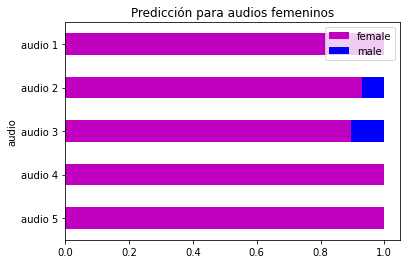

In [14]:
#Mujeres
percentages_women = pd.DataFrame(columns=['audio','male','female'])
i = 1
for spec in spec_women_test_list:
    x_test=[]
    y_test=[]
    for segment in range(0,spec.shape[1]-10,10):
        x_test.append(spec[:,segment:segment+10].reshape((128,10,1)))
        y_test.append([1,0])

    x_test=np.array(x_test)
    prediccion=np.round(model.predict(x_test))
    prediccion=[x[0] for x in prediccion]
    hombres=[x for x in prediccion if x == 1]
    mujeres=[x for x in prediccion if x == 0]
    print("Porcentaje hombre: ",round((len(hombres)/len(prediccion))*100,2),"\tPorcentaje mujer: ",round((len(mujeres)/len(prediccion))*100,2))
    
    row = ["audio "+str(i),len(mujeres)/len(prediccion),len(hombres)/len(prediccion)]
    df = pd.DataFrame([row], columns = ["audio", "female", "male"])
    percentages_women= pd.concat([df,percentages_women])
    i += 1
    
percentages_women.plot(
    x = 'audio',
    kind = 'barh',
    stacked = True,
    title = 'Predicción para audios femeninos',
    mark_right = True,
    color=['m','b'])

In [15]:
accuracy = round(percentages_women['female'].sum()/5,2)
print(f"El modelo tiene un acccuracy de {accuracy} para la clase female.")

El modelo tiene un acccuracy de 0.96 para la clase female.


Porcentaje hombre:  85.0 	Porcentaje mujer:  15.0
Porcentaje hombre:  75.0 	Porcentaje mujer:  25.0
Porcentaje hombre:  100.0 	Porcentaje mujer:  0.0
Porcentaje hombre:  34.62 	Porcentaje mujer:  65.38
Porcentaje hombre:  71.43 	Porcentaje mujer:  28.57


<AxesSubplot:title={'center':'Predicción para audios masculinos'}, ylabel='audio'>

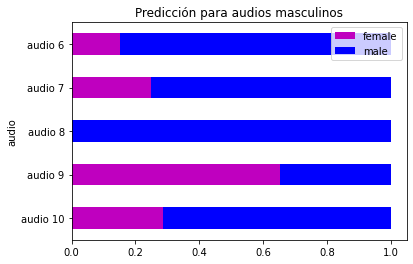

In [16]:
#Hombres
percentages_men = pd.DataFrame(columns=['audio','male','female'])
for spec in spec_men_test_list:
    x_test=[]
    y_test=[]
    for segment in range(0,spec.shape[1]-10,10):
        x_test.append(spec[:,segment:segment+10].reshape((128,10,1)))
        y_test.append([1,0])

    x_test=np.array(x_test)
    prediccion=np.round(model.predict(x_test))
    prediccion=[x[0] for x in prediccion]
    hombres=[x for x in prediccion if x == 1]
    mujeres=[x for x in prediccion if x == 0]
    print("Porcentaje hombre: ",round((len(hombres)/len(prediccion))*100,2),"\tPorcentaje mujer: ",round((len(mujeres)/len(prediccion))*100,2))
    
    row = ["audio "+str(i),len(mujeres)/len(prediccion),len(hombres)/len(prediccion)]
    df = pd.DataFrame([row], columns = ["audio", "female", "male"])
    percentages_men= pd.concat([df,percentages_men])
    i += 1
    
percentages_men.plot(
    x = 'audio',
    kind = 'barh',
    stacked = True,
    title = 'Predicción para audios masculinos',
    mark_right = True,
    color=['m','b'])

In [17]:
accuracy = round(percentages_men['male'].sum()/5,2)
print(f"El modelo tiene un acccuracy de {accuracy} para la clase male.")

El modelo tiene un acccuracy de 0.73 para la clase male.
